In [2]:
import numpy as np
import matplotlib.pyplot as plt



## Exercice 2 : maximum de vraisemblance

### <span style="color:blue">QUESTION 2.1 :</span> 

Tirer 10 fois une pièce à pile ou face et modéliser les résultats obtenus comme ceux d'une variable aléatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.

Calculez le maximum de vraisemblance du paramètre p d'un loi de Bernoulli qui modéliserait le problème. Pour y arriver, différentes valeures possibles de p seront testées et le p retenu sera celui qui a la plus grande vraisemblance.


- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.




In [43]:
NbTirages=10000000
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)

def vraisemblance(n_pile, n_face, p) :

    return (p**n_pile)*(1-p)**n_face


def log_vraisemblance(n_pile, n_face, p):
    
    return n_pile * np.log(p) + n_face * np.log(1-p)
 

def max_vraisemblance(n_pile, n_face, list_p) :
    
    M = -np.inf
    p_hat = None
    for candidate in list_p:
        vr = log_vraisemblance(n_pile, n_face, candidate)
        if vr >= M:
            M = vr
            p_hat = candidate
    return p_hat

print(max_vraisemblance(NbPiles, NbFaces, PossibleValuesForP))

0.495050505050505



### <span style="color:blue">QUESTION 2.2 :</span> 


Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages. Pour éviter de tirer des centaines de fois à pile ou face, vous pourrez juste modifier *NbTirages¨et *NbPiles* dans le code, puis voir le comportement de la courbe *plt.plot(PossibleValuesForP,CorrespondingLikelihood)*.


### <span style="color:blue">REPONSE 2.2 :</span> 



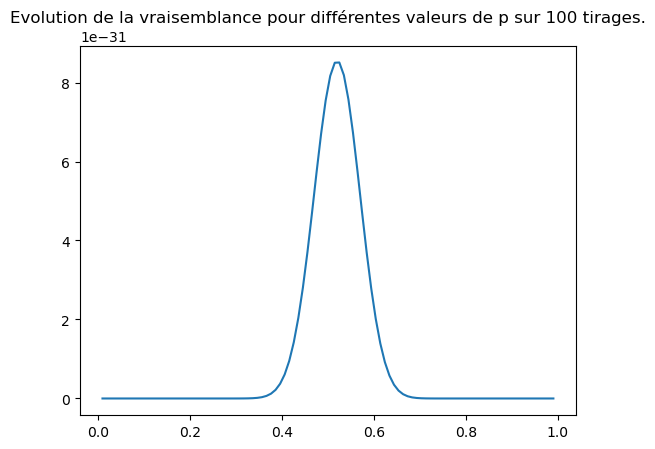

In [49]:
NbTirages = [10**i for i in range(7)]
NbPiles = []
NbFaces = []
p_hat = []
CorrespondingLikelihood = []

PossibleValuesForP=np.linspace(0.01,0.99,100)

for i in range(len(NbTirages)) :
    NbPiles.append(np.sum(np.random.randn(NbTirages[i]) > 0))
    NbFaces.append(NbTirages[i] - NbPiles[i])

    p_hat.append(max_vraisemblance(NbPiles[i], NbFaces[i], PossibleValuesForP))

# plt.plot(PossibleValuesForP, p_hat)
# plt.show()

k = 2
for i in range(len(PossibleValuesForP)) :
    CorrespondingLikelihood.append(vraisemblance(NbPiles[k], NbFaces[k], PossibleValuesForP[i]))

plt.title(f"Evolution de la vraisemblance pour différentes valeurs de p sur {NbTirages[k]} tirages.")
plt.plot(PossibleValuesForP, CorrespondingLikelihood)
plt.show()


### <span style="color:blue">QUESTION 2.3 :</span> 


Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.

### <span style="color:blue">REPONSE 2.3 :</span> 


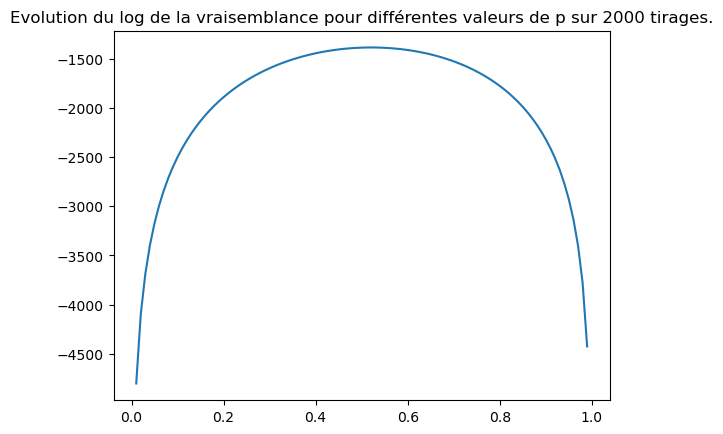

In [53]:
NbTirages=2000
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles

CorrespondingLogLikelihood = []

PossibleValuesForP=np.linspace(0.01,0.99,100)

for i in range(len(PossibleValuesForP)) :
    CorrespondingLogLikelihood.append(log_vraisemblance(NbPiles, NbFaces, PossibleValuesForP[i]))

plt.title(f"Evolution du log de la vraisemblance pour différentes valeurs de p sur {NbTirages} tirages.")
plt.plot(PossibleValuesForP, CorrespondingLogLikelihood)
plt.show()